In [1]:
import numpy as np
from numpy.core.numeric import cross
import pandas as pd
from datetime import datetime
from sklearn.metrics import accuracy_score

In [2]:
#We firstly display the data
pd.options.display.max_columns = None
data = pd.read_csv('https://advait-chirmule.github.io/KaggleTitanic/train.csv')
print(data.head(15))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                

In [3]:
#We can rule out the name as that we know that wouldn't help one to survive
data = data.drop(columns="Name")
#We also drop Ticket as there is very little relevant info in it
data = data.drop(columns="Ticket")
print(data.head(5))

#We check how many unique values every column has and how many missing values it has
print(data.nunique())
data.isnull().sum()

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0            1         0       3    male  22.0      1      0   7.2500   NaN   
1            2         1       1  female  38.0      1      0  71.2833   C85   
2            3         1       3  female  26.0      0      0   7.9250   NaN   
3            4         1       1  female  35.0      1      0  53.1000  C123   
4            5         0       3    male  35.0      0      0   8.0500   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  
PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Cabin          147
Embarked         3
dtype: int64


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#We do label encoding on the gender column
data['Sex'] = data['Sex'].replace("male", "0")
data['Sex'] = data['Sex'].replace("female", "1")
print(data.head(5))

   PassengerId  Survived  Pclass Sex   Age  SibSp  Parch     Fare Cabin  \
0            1         0       3   0  22.0      1      0   7.2500   NaN   
1            2         1       1   1  38.0      1      0  71.2833   C85   
2            3         1       3   1  26.0      0      0   7.9250   NaN   
3            4         1       1   1  35.0      1      0  53.1000  C123   
4            5         0       3   0  35.0      0      0   8.0500   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  


In [5]:
#For cabin, we extract the letters and give them numbers based on their alphabet, 0 if NaN, we see G so let's convert till G for now
#For missing values here, we can just say only privileged people had cabins and rest didn't and we give 0 for those who didn't 
data['Cabin'] = data['Cabin'].fillna("0")
data1 =  data[data['Cabin'].str.contains('[A-Za-z]')]
print(data1)
data['Cabin'] = data['Cabin'].apply(lambda x: '1' if 'A' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '2' if 'B' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '3' if 'C' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '4' if 'D' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '5' if 'E' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '6' if 'F' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '7' if 'G' in x else x)
print(data.head(15))
data['Cabin'].describe()

     PassengerId  Survived  Pclass Sex   Age  SibSp  Parch     Fare  \
1              2         1       1   1  38.0      1      0  71.2833   
3              4         1       1   1  35.0      1      0  53.1000   
6              7         0       1   0  54.0      0      0  51.8625   
10            11         1       3   1   4.0      1      1  16.7000   
11            12         1       1   1  58.0      0      0  26.5500   
..           ...       ...     ...  ..   ...    ...    ...      ...   
871          872         1       1   1  47.0      1      1  52.5542   
872          873         0       1   0  33.0      0      0   5.0000   
879          880         1       1   1  56.0      0      1  83.1583   
887          888         1       1   1  19.0      0      0  30.0000   
889          890         1       1   0  26.0      0      0  30.0000   

           Cabin Embarked  
1            C85        C  
3           C123        S  
6            E46        S  
10            G6        S  
11     

count     891
unique      9
top         0
freq      687
Name: Cabin, dtype: object

In [6]:
#As there are 9 unique values and we already have converted, let's try to check if any letter if left
data1 =  data[data['Cabin'].str.contains('[A-Za-z]')]
print(data1)

     PassengerId  Survived  Pclass Sex   Age  SibSp  Parch  Fare Cabin  \
339          340         0       1   0  45.0      0      0  35.5     T   

    Embarked  
339        S  


In [7]:
#We find we have a cabin with T in it, so we replace it by 10 (if we replace by real value of T, it might be too far from rest of the data)
data['Cabin'] = data['Cabin'].apply(lambda x: '10' if 'T' in x else x)
data['Cabin'] = pd.to_numeric(data['Cabin'])

<BarContainer object of 5 artists>

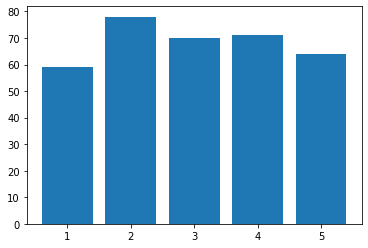

In [8]:
from matplotlib import pyplot as plt
import math

#We check if the passenger ID has any relevance to survival by plotting it
division = []
r = math.floor(len(data['Survived'])/5)
for i in range(5):
  count = 0
  a = i*r
  b = a + r
  for i in range(a, b):
    if(data.loc[i, 'Survived'] == 1):
      count = count + 1
  
  division.append(count)


plt.bar([1, 2, 3, 4, 5], division)

In [9]:
#As it is clear there is no relation between Passenger ID and Survival (as no trend), we can drop it
data = data.drop(columns="PassengerId")

#Next, as Siblings/Spouse and Parent/Children both talk about no. of family members, we can combine both columns
data['SibSp'] = data['SibSp'] + data['Parch']
data = data.drop(columns='Parch')
print(data.head(10))

   Survived  Pclass Sex   Age  SibSp     Fare  Cabin Embarked
0         0       3   0  22.0      1   7.2500      0        S
1         1       1   1  38.0      1  71.2833      3        C
2         1       3   1  26.0      0   7.9250      0        S
3         1       1   1  35.0      1  53.1000      3        S
4         0       3   0  35.0      0   8.0500      0        S
5         0       3   0   NaN      0   8.4583      0        Q
6         0       1   0  54.0      0  51.8625      5        S
7         0       3   0   2.0      4  21.0750      0        S
8         1       3   1  27.0      2  11.1333      0        S
9         1       2   1  14.0      1  30.0708      0        C


In [10]:
#For missing age, we can fill in the average age of the rest of the set
data['Age'].fillna(data['Age'].mean(), inplace=True)
print(data.head(10))

   Survived  Pclass Sex        Age  SibSp     Fare  Cabin Embarked
0         0       3   0  22.000000      1   7.2500      0        S
1         1       1   1  38.000000      1  71.2833      3        C
2         1       3   1  26.000000      0   7.9250      0        S
3         1       1   1  35.000000      1  53.1000      3        S
4         0       3   0  35.000000      0   8.0500      0        S
5         0       3   0  29.699118      0   8.4583      0        Q
6         0       1   0  54.000000      0  51.8625      5        S
7         0       3   0   2.000000      4  21.0750      0        S
8         1       3   1  27.000000      2  11.1333      0        S
9         1       2   1  14.000000      1  30.0708      0        C


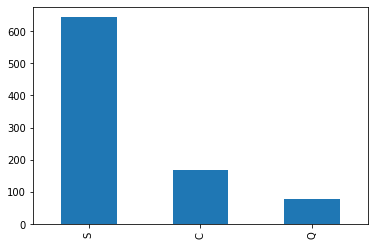

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#We only have two missing values in this column, so we check distribution of cities first
data['Embarked'].value_counts().plot.bar()

#As most of the passengers are from "S", we give them those values (done as only two entries like these)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [12]:
#Do One Hot Encoding on the Cities
Embarked = ColumnTransformer([('Embarked', OneHotEncoder(), [7])], remainder='passthrough')
data = Embarked.fit_transform(data)
data = pd.DataFrame(data)
print(data.head(15))

    0  1  2  3  4  5        6  7        8  9
0   0  0  1  0  3  0       22  1     7.25  0
1   1  0  0  1  1  1       38  1  71.2833  3
2   0  0  1  1  3  1       26  0    7.925  0
3   0  0  1  1  1  1       35  1     53.1  3
4   0  0  1  0  3  0       35  0     8.05  0
5   0  1  0  0  3  0  29.6991  0   8.4583  0
6   0  0  1  0  1  0       54  0  51.8625  5
7   0  0  1  0  3  0        2  4   21.075  0
8   0  0  1  1  3  1       27  2  11.1333  0
9   1  0  0  1  2  1       14  1  30.0708  0
10  0  0  1  1  3  1        4  2     16.7  7
11  0  0  1  1  1  1       58  0    26.55  3
12  0  0  1  0  3  0       20  0     8.05  0
13  0  0  1  0  3  0       39  6   31.275  0
14  0  0  1  0  3  1       14  0   7.8542  0


In [13]:
#As this is a classfication problem, we can try different algorithms 
#(A) Firstly, let's try SVM
from sklearn.model_selection import train_test_split

def SVM(data):
    from sklearn.svm import SVC

    x = data.drop(columns=3)
    y = data.loc[:, 3]
    y = y.astype('int')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

    model = SVC()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("The accuracy of this SVM model is: ", accuracy_score(y_test, y_pred))

data1 = data.copy()
SVM(data1)

The accuracy of this SVM model is:  0.6424581005586593


The accuracy of this KNN model is:  0.7206703910614525


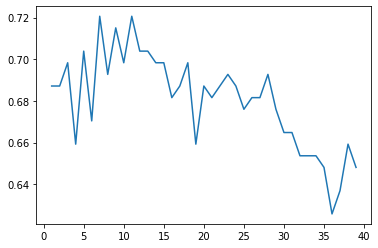

In [14]:
#(B) Next, let's try KNN
from matplotlib import pyplot as plt 

def KNN(data):
    error_rate = []
    index = []
    for i in range (1,40):
        index.append(i)
        x = data.drop(columns=3)
        y = data.loc[:, 3]
        y = y.astype('int')
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(accuracy_score(y_test, y_pred))
    
    plt.plot(index, error_rate)
    print("The accuracy of this KNN model is: ", max(error_rate))

data2 = data.copy()
KNN(data2)

In [15]:
#(C) Using Naive Bayes
def NB(data):
  from sklearn.naive_bayes import MultinomialNB
  x = data.drop(columns=3)
  y = data.loc[:, 3]
  y = y.astype('int')
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)
  
  mnb = MultinomialNB()
  mnb.fit(x_train, y_train)
  y_pred = mnb.predict(x_test)
  print("The accuracy of this Naive Bayes model is: ", accuracy_score(y_pred, y_test))

data3 = data.copy()
NB(data3)

The accuracy of this Naive Bayes model is:  0.6424581005586593


In [16]:
print("Comparing the three algorithms, we see that KNN works the best and thus, we use our KNN model for our final testing set")
#Now we use the test dataset and predict values
data = pd.read_csv('https://advait-chirmule.github.io/KaggleTitanic/test.csv')
datasave = data.copy()
data = data.drop(columns="Name")
data = data.drop(columns="Ticket")
data['Sex'] = data['Sex'].replace("male", "0")
data['Sex'] = data['Sex'].replace("female", "1")
data['Cabin'] = data['Cabin'].fillna("0")
data['Cabin'] = data['Cabin'].apply(lambda x: '1' if 'A' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '2' if 'B' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '3' if 'C' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '4' if 'D' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '5' if 'E' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '6' if 'F' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '7' if 'G' in x else x)
data['Cabin'] = data['Cabin'].apply(lambda x: '10' if 'T' in x else x)
data['Cabin'] = pd.to_numeric(data['Cabin'])
data = data.drop(columns="PassengerId")
data['SibSp'] = data['SibSp'] + data['Parch']
data = data.drop(columns='Parch')
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
Embarked = ColumnTransformer([('Embarked', OneHotEncoder(), [6])], remainder='passthrough')
data = Embarked.fit_transform(data)
data = pd.DataFrame(data)

def KNN(data2, i, data):
    x = data2.drop(columns=3)
    y = data2.loc[:, 3]
    y = y.astype('int')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

    from sklearn.neighbors import KNeighborsClassifier
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(accuracy_score(y_test, y_pred))

    y_final = knn.predict(data)
    return y_final

result = KNN(data2, 7, data)
output = pd.DataFrame({'PassengerId': datasave['PassengerId'], 'Survived': result})
output.to_csv('submission.csv', index=False)

Comparing the three algorithms, we see that KNN works the best and thus, we use our KNN model for our final testing set
0.7206703910614525
